# Introduction to NumPy

[Numpy](https://www.numpy.org) is a Python package for scientific computing. It is very well suited for signal processing applications.

NumPy is widely used in science and enginering both at universities and in industry. NumPy is free, open-source software.

This notebook is intended to provide you with an introduction to the NumPy concepts and commands that we will need for our class; that is a (very small) subset of what NumPy can do. You are encouraged to learn more about NumPy. Very good tutorial resources to help you with improving your NumPy skills can be found on the [NumPy website](https://numpy.org/learn/).

In [1]:
## configure plotting
%matplotlib inline
import matplotlib.pyplot as plt

## Importing NumPy

NumPy is a Python package that you must load before you can use it.

The canonical way to import Numpy is as follows; this statement should always appear as one of the very first statements in your notebooks or scripts.

In [2]:
## import NumPy
import numpy as np

## So, what's the big deal?

NumPy is built around the concept of N-dimensiional arrays. Most of the time, we will use 1-dimensional arrays (often called vectors) to store and process samples of a signal.

Last week we showed how to perform simple signal processing tasks, like generating samples of a sinusoid, in pure Python.

In pure Python, for-loops are required to compute the samples of a signal. Often, that can be done using a list comprehension. 

For example, we showed that a sinusoidal signal can be created in pure Python like this: 

In [3]:
## generate a sinusoid in pure Python
import math

# make a time grid (N=1000 samples between 1 and 2) using a list comprehension
N = 1000
tt = [1 + n/N for n in range(1000)]

# compute samples sinusoid 3*cos(2*pi*5*t - pi/3) over this grid
xx = [3 * math.cos(2 * math.pi * 5 * t - math.pi/3) for t in tt]

For comparison, in Numpy we can create a vector with the same samples like this:

In [4]:
## generate a sinusoid usng NumPy
tt = np.linspace(1, 2, N)
xx = 3 * np.cos(2 * np.pi * 5 * tt - np.pi/3)

Note in particular,

* there exists a command `linspace` to generate a grid of evenly spaced samples
* no list comprehension (or `for` loop) is required; the loop is built into the syntax
    - the multipkication `2 * np.pi * 5 * tt` applies to all elements of tt
    - the subtaction of `np.pi/3` applies to all elements of `2 * np.pi * 5 * tt`
    - the `np.cos` function is applied to an entire vector of samples
    - the multiplication by `3` also applies to all elements of the vector produced by the `np.cos` function
* we say this code is vectorized

Note, that an expression like 
```python
xx = 3 * np.cos(2 * np.pi * 5 * tt - np.pi/3)
```
is very similar in appearnace to the corresponding equation for a sinusoidal signal
$$
x(t) = 3 \cos(2 \pi 5 t - \frac{\pi}{3}).
$$

These features make signal processing using NumPy much simpler and more convenient than with pure Python


## NumPy Vectors

NumPy vectors or arrays are containers that we use to hold signal samples.

* most of the time, we will be using 1-dimensional arrays (vectors)
* occasionaly, it makes sense to use two (or even more) dimensions
    + e.g., a pair of stereo signals
    * the RGB channels of an image

NumPy vectors resemble Python lists
* they store a sequence of elements
* that can be accessed by an index, e.g., `xx[n]`,
* or as a slice, e.g.,  `xx[n:m]`

In contrast to Python lists, Numpy vectors
* must have elements that are all be of the same type, e.g., `float` or `complex`
    + that makes storage more compact and operations *much* faster
* are data types that support arithmetic operations directly, e.g., `xx + yy`

### Creating NumPy vectors

There are a number of ways to create and initialize a NumPy vector with values.

The most common ways are:
* create a NumPy vector from a Python list (using `np.array()`)
* create a vector of all zeros (using `np.zeros()`)
* create a vector of ones  (using `np.ones()`)
* create a vector of linearly spaced values (using `np.linspace()` or `np.arange()`)
* create a vector of logarithmically spaced values (using `np.logspace()`)

In [5]:
## Turn a list into a NumPy array: pass a list to `np.array`
x1 = np.array( [0, 1, 2, 3, 4, 5] )

## make a vector of 10 zeros (of type `float`)
x2 = np.zeros(10)
# if you need a vector of complex numbers, initialized with zeros, say so
x3 = np.zeros(10, dtype=complex)

## make a vector of 20 ones (of type `float`)
x4 = np.ones(20)
# need the initial values to be 1+j instead?
x5 = (1 + 1j) * np.ones(20)         # conversion to complex is automatic

### Constructing a vector of linearly spaced values

To synthesize signal samples, we have used a two-step process:
* construct a time grid of linearly spaced time instances
* use the time grid to compute sample values

NumPy has two ways to create the time-grid of evenly spaced samples:
* with `linspace` you specify: starting value $s$, end value $e$, and number of samples $N$, the spacing between samples is $d = \frac{|e-s|}{N-1}$
  - use `linspace` when you have a time interval and want a certain number of samples
* with `arange` you specify: starting value $s$, end value $e$, and spacing $d$, the number of samples is $N = \lceil \frac{e - s}{d} \rceil$
  - use arange, when you are given the sample rate $f_s$ as the spacing between samples is equal to $1/f_s$. 


<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
Note: with <tt>linspace</tt>, the end value e is included in the result, whereas with <tt>arange</tt> it is not. Unfortunately, that doesn't always make it easy to generate identical vectors using these two methods. 
</p>

In [6]:
## Two ways to generate a time grid
s = 0
e = 20
N = 51
d = (e - s) / (N-1)

# N samples between s and e (inclusive)
t1 = np.linspace(s, e, N)

# linearly spaced samples between s and e with spacing d; e is not included
t2 = np.arange(s, e, d)

print(f"The first {N-1} elements of t1 and t2 are the same: ", np.allclose(t1[:50], t2))
print("The two vectors are the same length:", len(t1) == len(t2))

The first 50 elements of t1 and t2 are the same:  True
The two vectors are the same length: False


### Logarithmically spaced values

Sometimes it iuseful to look at problems over many orders of magnitude, e.g., from Hz to GHz. This is useful, for example, when a function behaves like $1/x$.

In such cases, evenly spaced samples are not useful - one would end up with too few samples at low frequencies and too many at high frequencies.

Instead, we would like to keep the number of samples per order of magnitude constant.
* there would be as many samples between 1KHz and 10KHz as between 100KHz and 1GHz

The `logspace` command creates such a vector.

In [7]:
## generate a logarithmically spaced vector
ll = np.logspace(0, 2, 11)

# the vector has 5 samples per order of magnitude
print('the vector has {:d} samples between 1 and 10'.format(np.sum(ll < 10)))
print('the vector has {:d} samples between 10 and 100'.format(np.sum(np.logical_and(ll >=10, ll < 100))))

print('the vector is: ', ll)

the vector has 5 samples between 1 and 10
the vector has 5 samples between 10 and 100
the vector is:  [  1.           1.58489319   2.51188643   3.98107171   6.30957344
  10.          15.84893192  25.11886432  39.81071706  63.09573445
 100.        ]


### Sidebar: Attributes of NumPy arrays

Sometimes it is useful or necessary to know how big an array is or what type of data is stored in an array.

Each NumPy array has attributes that can be queried to answer these questions, including
* Assume that we have a NumPy array named `xx`, then
* `xx.ndim` provides the number of dimensions of the array
* `xx.shape` is a tuple that gives the length in each dimension
* `xx.dtype` indicates the data type of the elements
* `xx.data` reveals the memory address where the elemts of the array are stored

In [8]:
## make a 2D array
xx = np.array([[1., 2., 3.],
               [4., 5., 6.]])

print(f'xx is a {xx.ndim}-dimensional array.')
print(f'It consists of {xx.shape[0]} rows and {xx.shape[1]} columns')
print('It contains elements of type', xx.dtype)
print('Its elements are stored at memory address', xx.data)

xx is a 2-dimensional array.
It consists of 2 rows and 3 columns
It contains elements of type float64
Its elements are stored at memory address <memory at 0x11d5ef2a0>


## Math with NumPy Vectors

For signal processing, our main interest is to do computations with vectors. NumPy makes that very convenient; usually it is very straightforward to translate an equation or an expression into NumPy code.

The standard mathematical operations $+$, $-$, $\cdot$, etc. are defined for vectors.
* these operations are performed *element-by-element*
  - the `for` loop is implicit
* these operations will always work when
  - the two vectors have the same number of elements
  - one of the two operands is a scalar
  - there are a cases with arrays of more than one dimension which also work (more on this later)
* when the vectors are of different length, an error occurs

In [9]:
## make two equal length vectors and a scalar
a = np.linspace(1, 10, 10)   # [1, 2, 3, ..., 10]
b = np.linspace(10, 1, 10)   # [10, 9, 8, ..., 1]
c = 5.                       # 5

# then the following element-wise additions are easily computed without `for`
print("a + b = ", a + b)
print("a + c = ", a + c)

a + b =  [11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
a + c =  [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


The following unary and binary operations on vectors are also defined. They all operate on an element-by-element basis.

For each of the following operations, the result is a vector of the same length as `a` (or `b`).

In [10]:
## unary and binary operations on vectors
# unary minus (negation)
d = -a

# multiplication
e = a * b    # of two-vectors
f = a * c    # of a vector and a scalar

# division
g = a / b    # of two-vectors
h = a / c    # of a vector and a scalar
k = c / a    # of a scalar and a vector

# modulus (remainder)
l = a % b    # of two-vectors
m = a % c    # of a vector and a scalar
n = c % a    # of a scalar and a vector

# power
o = a ** b    # of two-vectors
p = a ** c    # of a vector and a scalar
q = c ** a    # of a scalar and a vector

# difference
r = a - b    # of two-vectors
s = a - c    # of a vector and a scalar
t = c - a    # of a scalar and a vector



When two vectors are not the same length, then element-by-element binary operations will fail.
* The error type is a `ValueError`
* and the error message references incompatible shapes

In [11]:
## Try to add a length-11 and a lenth-10 vector
# this fails
np.linspace(0, 10, 11) + np.arange(0, 10, 1)

ValueError: operands could not be broadcast together with shapes (11,) (10,) 

### Boolean vectors and logical operations

NumPy supports boolean and logical operations. Our main interest is in vectors of Boolean values.

Vectors of Boolean (binary logic) elements are usually the result of comparison operations.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #e7f3fe; border-left: 6px solid #2196F3;">
Recall that Python uses the Boolean values <tt>True</tt> and <tt>False</tt>.
</p>

We will see that such vectors are useful for selecting a subset of the elements of a vector.

The example below constructs two Boolean vectors:
* the first marks all elements $n$ where `a[n] > b[n]`
* the second marks all elements of `a` that are even

In [12]:
## make two Boolean vectors
# Recall a = [1, 2, 3, ..., 10] and b = [10, 9, 8, ..., 1]
bg = a > b   
be = ( a % 2 ) == 0

print('Boolean vector bg = ', bg)
print('Boolean vector be = ', be)
print('bg and be are of type', bg.dtype)

Boolean vector bg =  [False False False False False  True  True  True  True  True]
Boolean vector be =  [False  True False  True False  True False  True False  True]
bg and be are of type bool


We can perform standard logical operations on Boolean arrays, including:
* logical NOT (`~`)
* logical AND (`&`)
* logical OR (`|`)
* logical exclusive or (XOR) (`^`)


The examples below compute, where:
* both `a[n] > b[n]` and `a[n]` even
* either `a[n] > b[n]` and `a[n]` even
* `a[n]` is odd

In [13]:
## Examples of operations on Boolean vectors
print('a[n] > b[n] AND a[n] even:', bg & be)  # logical AND
print('a[n] > b[n] OR a[n] even: ', bg | be)  # logical OR
print('a[n] NOT even:            ', ~be)      # logical NOT

a[n] > b[n] AND a[n] even: [False False False False False  True False  True False  True]
a[n] > b[n] OR a[n] even:  [False  True False  True False  True  True  True  True  True]
a[n] NOT even:             [ True False  True False  True False  True False  True False]


#### Sidebar: Bitwise logical operations

For vectors of integers, we can also perform bitwise logical operations on elemnts of a vector. This is does not come up very frequently in signal processing but may be useful to keep in mind.

Recall that integers can be represented as a sequence of bits. The position of the bit gives it's place value.

For example, the (decimal) integer `13` is represented by the bit sequence `1101` because $11 = 1 \cdot 2^3 + 1 \cdot 2^2 + 0 \cdot 2^1 + 1 \cdot 2^0$.

Then, it makes sense to consider bit-by-bit operations between two integers. For example:
* the operation `13 & 7` corresponds to 
* the bitwise and of `1101` and `0111`
* the result is `0101`
* or decimal `5`

In [14]:
## `13 & 7` works in Python
print('13 & 7 =', 13 & 7)

## NumPy let's you do many such bit-wise operations at the same time
# we have to make sure that the elements are integers, though
v = np.arange(0, 16, 1, dtype=np.uint8)   # 0 to 15 as unsigned 8-bit integers
print('v & 7 = ', v & 7)                  # keep only the lower three bits

13 & 7 = 5
v & 7 =  [0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7]


### Functions of NumPy vectors

NumPy provides [(very) many functions](https://numpy.org/doc/stable/reference/routines.math.html) that are fully vectorized: 
* if you pass a vector to the function, 
* it applies the function to each element of the input vector,
* and returns a vector of the same length as the input.

For our class, we will need:
* trigonometric functions (`np.cos()` and `np.sin()`)
* the exponential function (`np.exp()`)
* and, less frequently:
  - square root (`np.sqrt()`)
  - logarithms (natural log `np.log()`, base-10 log `np.log10()`)
  - inverse trigonometric functions (especially, `np.arctan()`) or, 
  - better, the two-argument form `np.arctan2()` that handles negative real parts correctly

As we saw above, with these functions synthesizing a sinusoidal signal is straightforward:
* create a time-grid of linearly spaced values
* compute samples using the `np.cos()` function

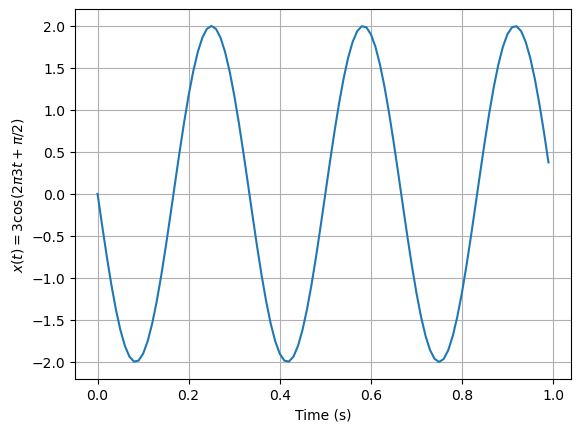

In [15]:
## synthesize a sinusoidal signal using np.cos()
# time axis: from 0 to 1 with a spacing of 0.01
tt = np.arange(0, 1, 0.01)

# sinusoid (A = 2, f = 3, phi = pi/2)
xx = 2 * np.cos(2*np.pi * 3 * tt + np.pi/2)

# plot to verify 
plt.plot(tt, xx)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('$x(t) = 3 \cos(2\pi 3t + \pi/2)$')

plt.show()

### Functions for complex vectors

NumPy has full support for complex algebra. All functions for which it makes sense accept complex-valued inputs and produce corresponding complex valued outputs.

Of primary interest for us will be the exponential function `np.exp()` with complex (usually purely imaginary) inputs.

NumPy provides functions to help with computations involving complex numbers, including:
* `np.real(z)` and `np.imag(z)` take the real and imaginary part of complex vector `z`
* `np.conjugate(z)` computes the conjugate complex of `z`
* `A, phi = np.polar(z)` computes the magnitude `A` and phase `phi` (in radians) in the polar representation of z
  - `A = np.abs(z)` computes the magnitude `A` by itself
  - `A = np.angle(z)` computes the phase by itself
* `np.deg2rad()` and `np.rad2deg()` convert between degrees and radians

The example below synthesizes a complex-valued signal and then converts it to polar coordinates.

In [16]:
## analyze a complex-valued signal 
zz = np.linspace(1, 5, 5) + 1j*(np.linspace(5, 1, 5))
print('z = ', zz)

# real and imaginary parts
print('Re{z} = ', np.real(zz), 'Im{z} = ', np.imag(zz))

# magnitude and phase
print('|z| = ', np.abs(zz))
print('phase(zz) = ', np.rad2deg(np.angle(zz)), '(in degrees)')

z =  [1.+5.j 2.+4.j 3.+3.j 4.+2.j 5.+1.j]
Re{z} =  [1. 2. 3. 4. 5.] Im{z} =  [5. 4. 3. 2. 1.]
|z| =  [5.09901951 4.47213595 4.24264069 4.47213595 5.09901951]
phase(zz) =  [78.69006753 63.43494882 45.         26.56505118 11.30993247] (in degrees)


## Functions to reduce a vector to a number

Many signal processing tasks require that the elements of a vector are reduced to a single number. Examples include the average of the elements or the largest of the elements. NumPy provides many such functions, including the following that we will need frequently:
* `np.sum()` computes the sum of all elements
* `np.mean()` computes the average
  - additional statistics, including median, standard deviation, and variance are also available.
* `np.prod()` computes the product of all elements
* `np.max()` and `np.min()` compute the largest and smallest element of the vector (for complex inputs, it compares values based on their absolute values)
* `np.argmax()` and `np.argmin()` find the index of the largest or smallest element
  - if `max_val = np.max(xx)`
  - and `ind_max = np.arg_max(xx)`
  - then `max_val` is equal to `xx[ind_max]`

The function `np.allclose(xx, yy)` is useful for checking if two vectors `xx` and `yy` are nearly identical (e.g., differ only because of numerical rounding errors).

For Boolean vectors, the following reductions are available:
* `np.all(bb)` checks if *all* elements of the Boolean vector `bb` are `True`; i.e., an AND over all elements of `bb`
* `np.any(bb)` checks if *any*  elements of the Boolean vector `bb` are `True`; i.e., an OR over all elements of `bb`

Below is an illustration of these functions.

In [17]:
## demonstrate NumPy's reduction functions
# make a test vector
xx = np.linspace(1, 10, 10)
print('xx = ', xx)

# Reduction functions
print('np.sum(xx) = ', np.sum(xx))
print('np.mean(xx) = ', np.mean(xx))
print('np.prod(xx) = ', np.prod(xx))
print('np.max(xx) = ', np.max(xx))
print('np.argmax(xx) = ', np.argmax(xx))
print('np.min(xx) = ', np.min(xx))
print('np.argmin(xx) = ', np.argmin(xx))

# comparison of two vectors
print('Elements of xx equal to `np.arange(1, 10.1, 1)`?', np.allclose(xx, np.arange(1, 10.1, 1)))

# Boolean reductions
print('All elements of xx positive?', np.all(xx > 0))
print('Any element divisible by 7?', np.any( (xx % 7) == 0))


xx =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
np.sum(xx) =  55.0
np.mean(xx) =  5.5
np.prod(xx) =  3628800.0
np.max(xx) =  10.0
np.argmax(xx) =  9
np.min(xx) =  1.0
np.argmin(xx) =  0
Elements of xx equal to `np.arange(1, 10.1, 1)`? True
All elements of xx positive? True
Any element divisible by 7? True


## Indexing for NumPy Vectors

Indexing refers to accessing a single element or a group of elements of a vector. Indexing can be used to retrieve (read) or to modify (write) selected elements.

We distinguish three case:
* accesing a single elements, e.g. a specific element `xx[n]`
* accessing contiguous elements (slices), e.g., a range of elements`xx[n:m]`
* accessing elements that meet a condition (logical indexing), e.g., all positive elements `xx[xx > 0]`

The first case works just like for Python lists. For a vector `xx`, we can access the `n`-th element as `xx[n]`.
* when the index `n` is greate than or equal to the length of `xx`, an `IndexError` occurs.

We can either,
* retrieve (read from) `xx[n]`, as in `this_val = xx[n]` or
* modify (write to) `xx[n]`, as in `xx[n] = 7`

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
Try to avoid accessing single elements of a vector. All the speed advantages of vectorization are lost when elements are accessed one-by-one.
</p>

For the two other case, let's consider a concrete example application.

We want to create a trapezoidal signal (a ramp up, followed by a flat segment, followed by a ramp down). Specifically, we want (samples of) the signal given by
$$
p(t) = \begin{cases}
    t & 0 \leq t < 1 \\
    1 & 1 \leq t < 4 \\
    5 - t & 4 \leq t < 5
\end{cases}
$$
We want to compute 10 samples of this signal per second.

We will generate this signal using index slicing and then using logical indexing.

With slices, we recognize that there are three contiguous regions where the signal is defined by an expression. 

For each of these regions, we need to figure out the range of indices that correspond to that region; rcall that there are 10 samples per second:
* the first region ($0 \leq t <10$) is comprised of the first 10 samples, i.e., indices 0 to 10 (exclusive)
* the next region ($1 \leq t < 4$) is comprised of the next 30 samples, i.e., indices 10 to 40 (exclusive)
* the third region ($4 \leq t < 5$ ) is comprised of the final 10 samples, i.e., indices 40 to 50 (exclusive)

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
Before we can modify the array, we must first allocate it, e.g., using <tt>np.zeros()</tt>.
</p>

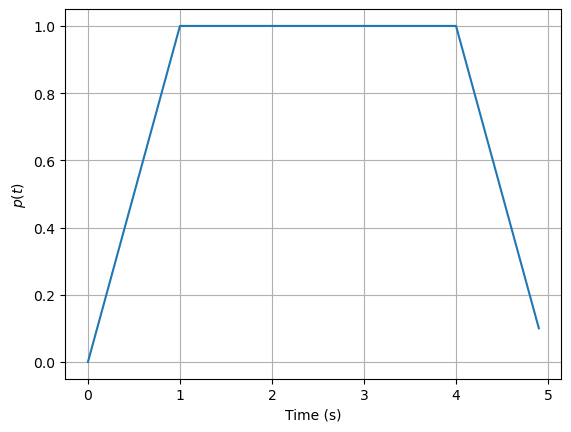

In [18]:
## Make a trapezoid using slice syntax
fs = 10
# allocate an array of the right size (51 samples)
pp = np.zeros(50)

# process each slice
pp[0 : 10] = np.arange(0, 1, 1/fs)  # or np.linspace(0, 0.9, 10)
pp[10 : 40] = 1
pp[40 : 50] = np.arange(1, 0, -1/fs) # or np.linspace(1, 0.1, 10)

plt.plot(np.arange(0, 5, 1/fs), pp)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('$p(t)$')

plt.show()

For logical indexing, we derive conditions from a vector `tt` that defines our time grid.

As a result, the code resembles the conditions in the expression for $p(t)$.

In each assignment, the number of "selected" elements must be the same on both sides of the `=` sign.
* this usually means that the same condition appears on both sides of the `=`
* except, when the assigned value is a scalar.

Notice how we don't need to figure out (manually) how any samples there are in each region.
* That means, this method will work even when the sample rate is changed.

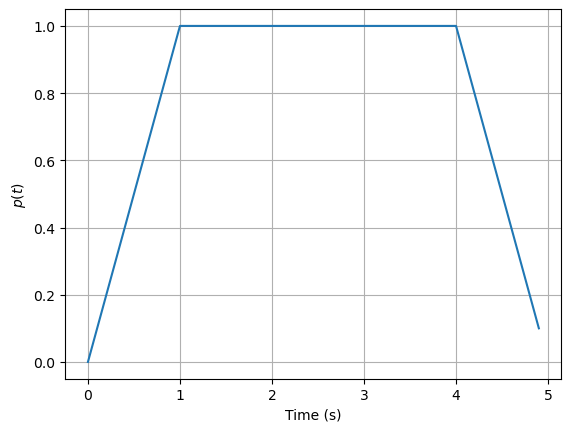

In [19]:
## Make a trapezoid using logical indexing
# allocate an array of the right size (51 samples)
pp = np.zeros(50)

# make a tie axis - this is used for logical indexing
tt = np.arange(0, 5, 1/fs)

# for each region, use a condition on tt for indexing
# it is critical that the number of selected elements on both sides of the assignment are equal
pp[ tt < 1]                = tt[ tt < 1]
pp[ (tt >= 1) & (tt < 4) ] = 1
pp[ tt >= 4]               = 5 - tt[ tt >= 4 ]

plt.plot(np.arange(0, 5, 1/fs), pp)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('$p(t)$')

plt.show()

## Summary

This concludes our very brief tour of NumPy. The material in this notebook should be sufficient for the upcoming labs. We will introduce a few other functions as needed when we cover advanced topics.

Make sure that you have a solid grasp of the topics that were covered:
* you should be able to create vectors, especially for evenly spaced elements using `np.arange` or `np.linspace`
* understand the idea of vectorization: operations like addition, multiplication, or computing the cosine apply to **all** elements of the vector. This implies that there is no explicit `for` loop over the elements of the vector.
* you should remember the handful of functions that will be used frequently
* understand the different ways to access elements of arrays, including slice notation and logical indexing.

Test you understanding by working through the `pre_lab_exercises` notebook.